In [ ]:
import pandas as pd
import numpy as np

**Load Dataset**

In [ ]:
df = pd.read_csv('/content/fraudTest.csv')

In [ ]:
print("Initial Data Shape:", df.shape)

Initial Data Shape: (555719, 23)


In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


**Actual Fraude (by using label)**

In [ ]:
fraud_counts = df['is_fraud'].value_counts()

total_zeros = fraud_counts.get(0, 0)  # count of 0
total_ones = fraud_counts.get(1, 0)   # count of 1

print(f"Total Non-Fraud (0): {total_zeros}")
print(f"Total Fraud (1): {total_ones}")

Total Non-Fraud (0): 553574
Total Fraud (1): 2145


**Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
print("\nUnique values:\n", df.nunique())


Unique values:
 Unnamed: 0               555719
trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64


#**Data Cleaning & Feature Engineering**

**Drop Unnecessary Columns**

In [ ]:
df.drop(['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)


**Convert DOB to Age**

In [ ]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = 2025 - df['dob'].dt.year
df.drop('dob', axis=1, inplace=True)

**Extract Time Features**

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df.drop('trans_date_trans_time', axis=1, inplace=True)

**Label Encoding (Categorical Features)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # M/F -> 0/1
df['job'] = le.fit_transform(df['job'].astype(str))  # In case of NaN
df['category'] = le.fit_transform(df['category'].astype(str))
df['merchant'] = le.fit_transform(df['merchant'].astype(str))
df['city'] = le.fit_transform(df['city'].astype(str))
df['state'] = le.fit_transform(df['state'].astype(str))

**Calculate Distance Between Customer & Merchant**

In [ ]:
from geopy.distance import geodesic

In [ ]:
def calculate_distance(row):
    try:
        return geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).km
    except:
        return 0

In [ ]:
df['distance'] = df.apply(calculate_distance, axis=1)


In [ ]:
df.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis=1, inplace=True)

**Target Separation & Scaling**

In [ ]:
from sklearn.preprocessing import  StandardScaler

In [ ]:
labels = df['is_fraud']           # Save true labels for later evaluation

In [ ]:
df.drop('is_fraud', axis=1, inplace=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)    # Scaled features

In [ ]:
from sklearn.decomposition import PCA

**Apply PCA**

In [ ]:
pca = PCA(n_components=16, random_state=42)
X = pca.fit_transform(X_scaled)  # PCA-transformed features

**verify features and dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   merchant          555719 non-null  int64  
 1   category          555719 non-null  int64  
 2   amt               555719 non-null  float64
 3   gender            555719 non-null  int64  
 4   city              555719 non-null  int64  
 5   state             555719 non-null  int64  
 6   zip               555719 non-null  int64  
 7   city_pop          555719 non-null  int64  
 8   job               555719 non-null  int64  
 9   unix_time         555719 non-null  int64  
 10  age               555719 non-null  int32  
 11  transaction_hour  555719 non-null  int32  
 12  transaction_day   555719 non-null  int32  
 13  distance          555719 non-null  float64
 14  predicted         555719 non-null  int64  
 15  actual            555719 non-null  int64  
dtypes: float64(2), int32

In [ ]:
df


,merchant,category,amt,gender,city,state,zip,city_pop,job,unix_time,age,transaction_hour,transaction_day,distance,predicted,actual
0,319,10,2.86,1,157,39,29209,333497,275,1371816865,57,12,21,24.613746,0,0
1,591,10,29.84,0,16,43,84002,302,392,1371816873,35,12,21,104.834043,0,0
2,611,5,41.28,0,61,33,11710,34496,259,1371816893,55,12,21,59.204796,0,0
3,222,9,60.05,1,764,8,32780,54767,407,1371816915,38,12,21,27.615117,0,0
4,292,13,3.19,1,247,21,49632,1126,196,1371816917,70,12,21,104.423175,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,443,23,63453,519,460,1388534347,59,23,31,77.032467,0,0
555715,264,7,111.84,1,401,42,77566,28739,198,1388534349,26,23,31,100.023736,0,0
555716,496,7,86.88,0,104,46,99323,3684,294,1388534355,44,23,31,80.887812,0,0
555717,75,13,7.99,1,476,12,83643,129,58,1388534364,60,23,31,53.060882,0,0


In [ ]:
df.shape

(555719, 16)

**Train Isolation Forest Model**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model = IsolationForest(n_estimators=100, contamination=0.0175, random_state=42)

model.fit(X)


IsolationForest(contamination=0.0175, random_state=42)

**Predict Anomalies**

In [ ]:
predictions = model.predict(X)

In [ ]:
predicted = []
#Loop through each prediction and convert -1 to 1 (fraud), 1 to 0 (normal)
for p in predictions:
    if p == -1:
        predicted.append(1)  # Anomaly (Fraud)
    else:
        predicted.append(0)  # Normal

In [ ]:
# Add the results as a new column in the original dataframe
df['predicted'] = predicted

**Evaluation**

In [ ]:
df['actual'] = labels.values

In [ ]:
# Summary counts
total_records = df.shape[0]
actual_fraud = df['actual'].sum()
predicted_anomalies = df['predicted'].sum()

In [ ]:
comparison_df = pd.DataFrame({
    'Metric': [
        'Total Records',
        'Actual Fraudulent Transactions',
        'Predicted Anomalies (Fraud)'
    ],
    'Count': [
        total_records,
        actual_fraud,
        predicted_anomalies
    ]
})

In [ ]:
print("\n--- Comparison Summary ---")
print(comparison_df)


--- Comparison Summary ---
                           Metric   Count
0                   Total Records  555719
1  Actual Fraudulent Transactions    2145
2     Predicted Anomalies (Fraud)    9726


In [ ]:
total_records = df.shape[0]
anomaly_count = df[df['predicted'] == 1].shape[0]
normal_count = total_records - anomaly_count
anomaly_percentage = (anomaly_count / total_records) * 100

In [ ]:
print(f"Total Records: {total_records}")
print(f"Anomalies Detected: {anomaly_count}")
print(f"Anomaly Percentage: {anomaly_percentage:.2f}%")

Total Records: 555719
Anomalies Detected: 9726
Anomaly Percentage: 1.75%


In [ ]:


true_positives = df[(df['actual'] == 1) & (df['predicted'] == 1)].shape[0]
false_positives = df[(df['actual'] == 0) & (df['predicted'] == 1)].shape[0]
false_negatives = df[(df['actual'] == 1) & (df['predicted'] == 0)].shape[0]

print(f"True Positives (Fraud correctly detected): {true_positives}")
print(f"False Positives (Normal flagged as fraud): {false_positives}")
print(f"False Negatives (Fraud missed): {false_negatives}")


True Positives (Fraud correctly detected): 2145
False Positives (Normal flagged as fraud): 7581
False Negatives (Fraud missed): 0


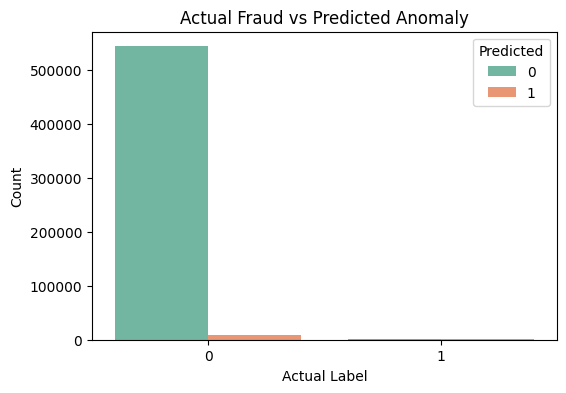

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='actual', hue='predicted', data=df, palette='Set2')
plt.title('Actual Fraud vs Predicted Anomaly')
plt.xlabel('Actual Label')
plt.ylabel('Count')
plt.legend(title='Predicted')
plt.show()


#**Visualization**

**Pie Chart**

In [ ]:
import matplotlib.pyplot as plt

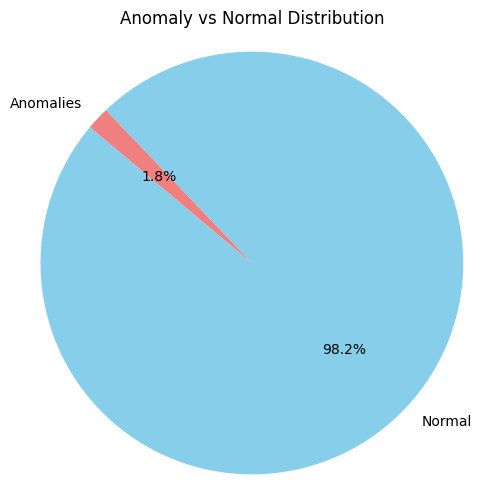

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie([normal_count, anomaly_count], labels=['Normal', 'Anomalies'], colors=['skyblue', 'lightcoral'],
        autopct='%1.1f%%', startangle=140)
plt.title('Anomaly vs Normal Distribution')
plt.axis('equal')
plt.show()


**Bar Chart**

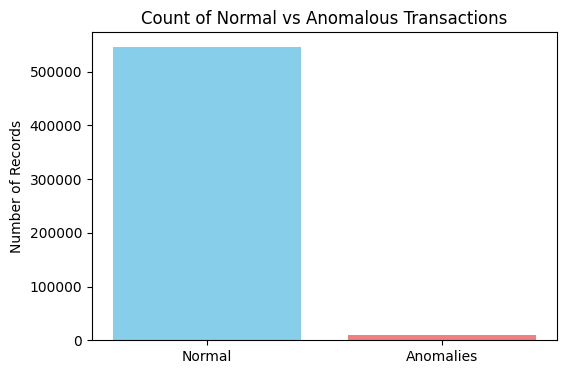

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Normal', 'Anomalies'], [normal_count, anomaly_count], color=['skyblue', 'lightcoral'])
plt.title('Count of Normal vs Anomalous Transactions')
plt.ylabel('Number of Records')
plt.show()


In [ ]:
import pickle

In [ ]:
# Save the model
with open('isolation_forest.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
from google.colab import files
files.download('isolation_forest.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>